In [5]:
import networkx as nx

# Create an empty directed graph
G = nx.DiGraph()

with open('../../data/BuzzFeedNewsUser.txt', 'r') as f:
    for line in f:
        news_id, user_id, count = map(int, line.strip().split())
        news_node = f'news_{news_id}'
        user_node = f'user_{user_id}'
        
        G.add_node(news_node, type='news')
        G.add_node(user_node, type='user')
        
        # You can store count as edge attribute if you want
        G.add_edge(user_node, news_node, count=count)

# Then, add User-User edges
with open('../../data/BuzzFeedUserUser.txt', 'r') as f:
    for line in f:
        follower_id, followee_id = map(int, line.strip().split())
        follower_node = f'user_{follower_id}'
        followee_node = f'user_{followee_id}'
        
        G.add_node(follower_node, type='user')
        G.add_node(followee_node, type='user')
        
        G.add_edge(follower_node, followee_node)

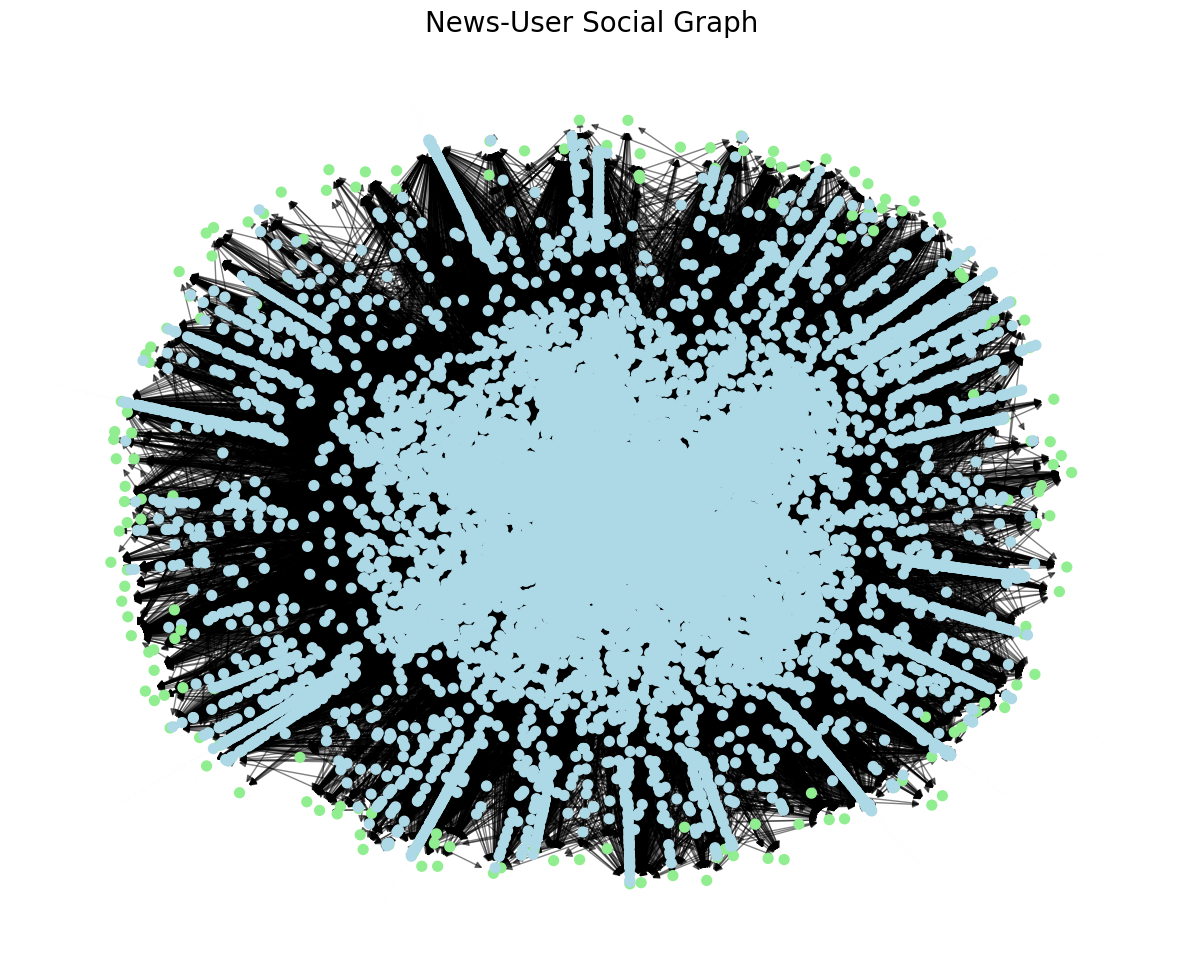

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

# Assume your graph is already built as G

# Set color for nodes
color_map = []
for node in G.nodes(data=True):
    if node[1]['type'] == 'user':
        color_map.append('lightblue')
    elif node[1]['type'] == 'news':
        color_map.append('lightgreen')
    else:
        color_map.append('gray')

# Draw the graph
plt.figure(figsize=(15, 12))
pos = nx.spring_layout(G, seed=42)

nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=50)
nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.title("News-User Social Graph", fontsize=20)
plt.axis('off')
plt.show()


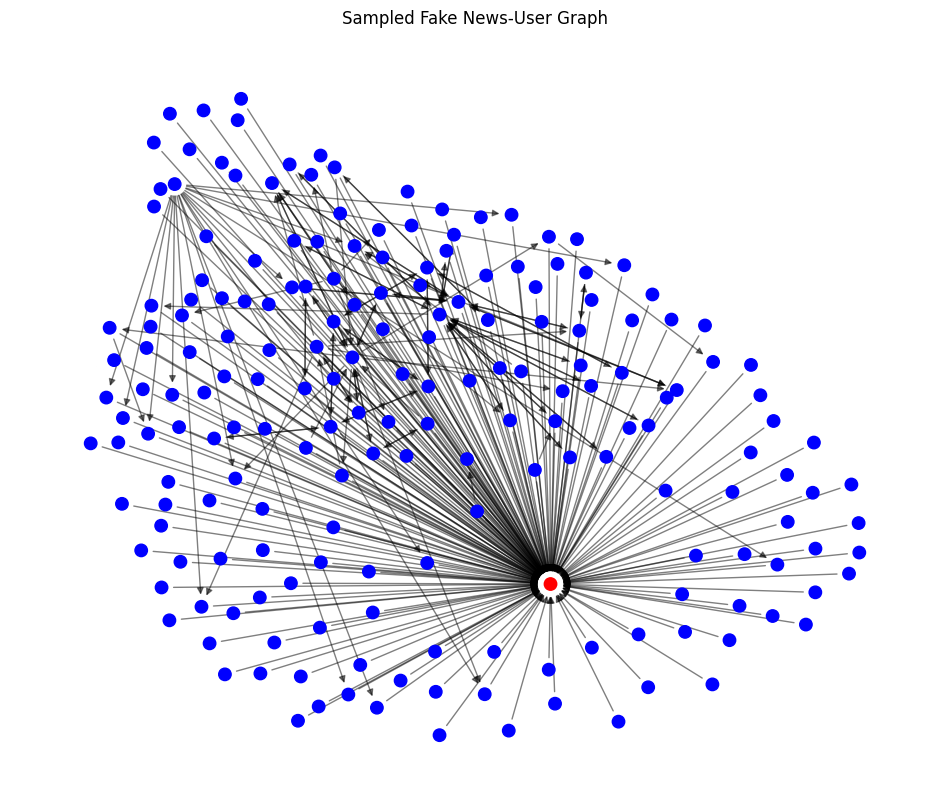

In [7]:
import matplotlib.pyplot as plt
import random


# fake_news_ids = {94, 109, 132}
fake_news_ids = {109}
real_news_ids = {}
# real_news_ids = {}
# Create node labels
fake_news_set = set(f'news_{i}' for i in fake_news_ids)
real_news_set = set(f'news_{i}' for i in real_news_ids)

# Sample 20 news articles (from those labeled fake or real)
labeled_news_nodes = list(fake_news_set | real_news_set)
sampled_news = random.sample(labeled_news_nodes, 1)

# Get all users who shared those news articles
connected_users = set()
for news in sampled_news:
    connected_users.update(
        nbr for nbr in G.predecessors(news) if G.nodes[nbr]['type'] == 'user'
    )
# Combine into a subgraph
sampled_nodes = sampled_news + list(connected_users)
G_sub = G.subgraph(sampled_nodes).copy()

# Set node colors
color_map = []
for node, data in G_sub.nodes(data=True):
    if data['type'] == 'user':
        color_map.append('blue')
    elif node in fake_news_set:
        color_map.append('red')
    elif node in real_news_set:
        color_map.append('green')
    else:
        color_map.append('gray')

# Draw the graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G_sub, seed=42)

nx.draw_networkx_nodes(G_sub, pos, node_color=color_map, node_size=80)
nx.draw_networkx_edges(G_sub, pos, arrows=True, alpha=0.5)

plt.title("Sampled Fake News-User Graph")
plt.axis('off')
plt.show()